<a href="https://colab.research.google.com/github/iamlilylim/PythonStudy/blob/main/Pandas_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


jupyter환경에서 시각화 바로 보이게 설정

In [3]:
%matplotlib inline

In [ ]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

df = pd.read_csv(url)
df.head()# showing top 5 ilne

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.describe() #수치 통계 요약

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.columns #열이름

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
df.shape #data size(row, column)

(891, 12)

**Choosing data, Analysing filters**

In [22]:
#하나의 열 선택
df['Age'].head()

#multiple column
df[['Name','Age']].head()

#+30 passengers and male
df[df['Age']>30].head()

df[(df['Age']>30) & (df['Sex'] == 'female')].head()




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S


# 기초 통계 및 정렬

In [24]:
#AVERAGE AGE
df['Age'].mean()

np.float64(29.69911764705882)

In [25]:
#survival
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [28]:
#organise by age

df.sort_values(by='Age', ascending=False).head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


# organise by groups

In [31]:
#groupby()
#성별에 따른 생존률 평균
df.groupby('Sex')['Survived'].mean()


,Survived
Sex,
female,0.742038
male,0.188908


In [32]:
#선실 class 에 따른 평균 나이
df.groupby('Pclass')['Age'].mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


# simple visualisation

# survived by sex

<Axes: title={'center': 'Survival rate by Sex'}, xlabel='Sex'>

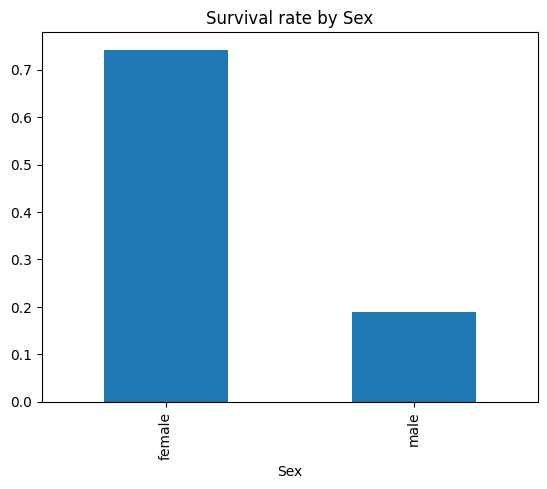

In [35]:
df.groupby('Sex')['Survived'].mean().plot(kind='bar',title='Survival rate by Sex')

[]

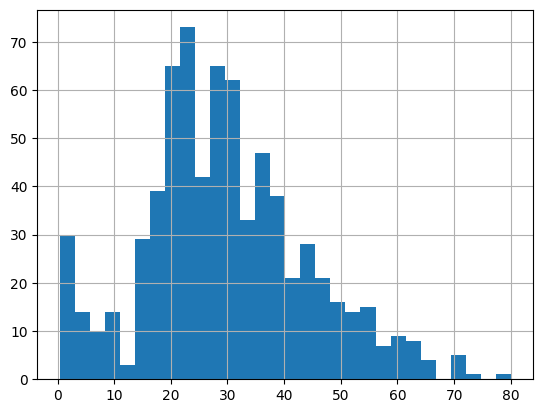

In [44]:
#age distribution histogram
df['Age'].hist(bins=30).plot(title='Age Distribution')
#plt.title('Age Distribution')


In [ ]:
#가장 나이가 많은 승객
#1등석 승객 평균 생존률
#나이 20세 이하인 승객수
df.['Age']